### About Data

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

* The data is a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club  



### Aim

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can a model that can predict wether a borrower will pay back their loan is built. This way in the future decision about a potential customer can be assessed on their likeliness to pay back the loan. This will be a binary classification type of prediction

*  The "loan_status" column is the label.

In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [ ]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [ ]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [ ]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


## Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

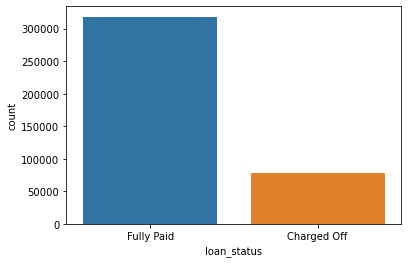

In [ ]:
sns.countplot(x='loan_status',data=df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

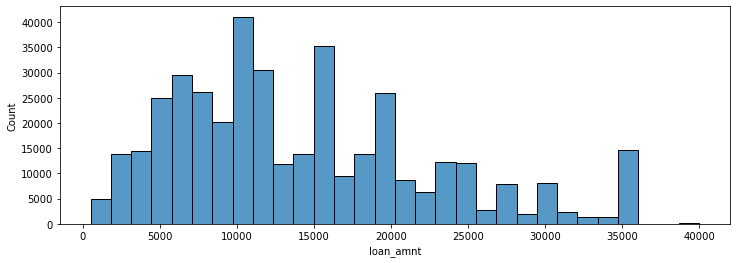

In [ ]:
'''
Its is clear the this is an imbalanced data set. More often than not,
people pay off their loans.
'''
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'],kde=False,bins=30)

In [ ]:
# Correlation between the continuous feature variables
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

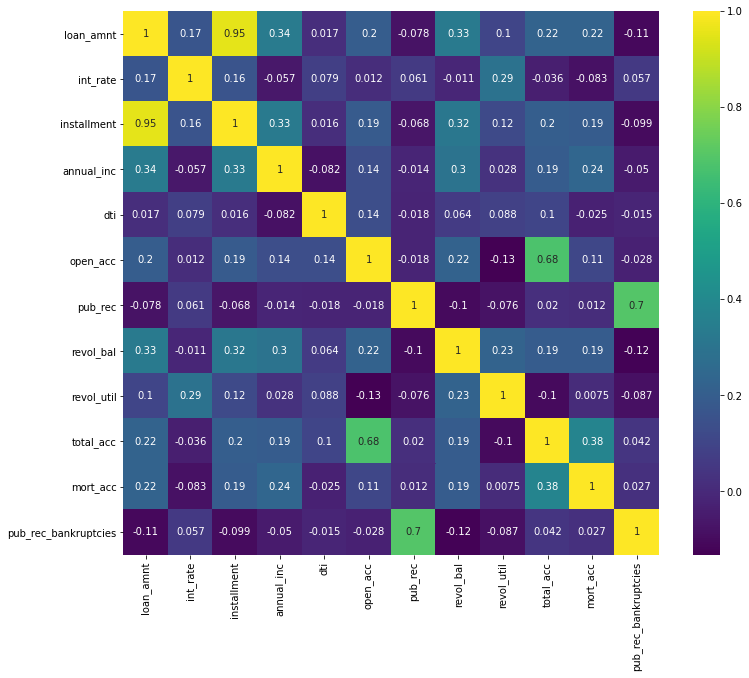

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [ ]:
# Loan amount and installment is highly corrilated

feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [ ]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

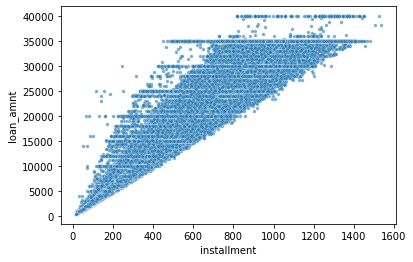

In [ ]:
# Definiations clear things out

sns.scatterplot(x='installment',y='loan_amnt',data=df,alpha=0.6,s=12)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

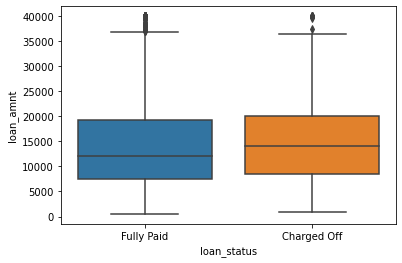

In [ ]:
#  The relationship between the loan_status and the Loan Amount.
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [ ]:
# Statistics for the loan amount, grouped by the loan_status.
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
# Grades and SubGrades assigned to the loans
feat_info('grade')
feat_info('sub_grade')

LC assigned loan grade
LC assigned loan subgrade


In [ ]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

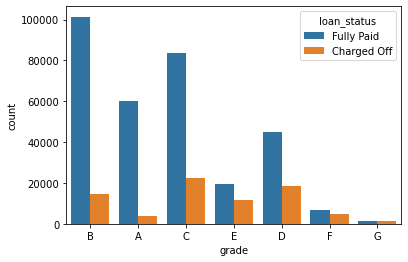

In [ ]:
# Loan Status w.r.t grade assigned
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

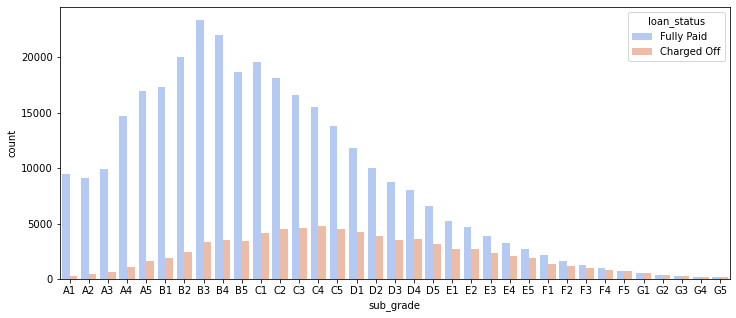

In [ ]:
subgrade_order = sorted(df['sub_grade'].unique())
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',data=df,
              hue='loan_status',
              order=subgrade_order,
              palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

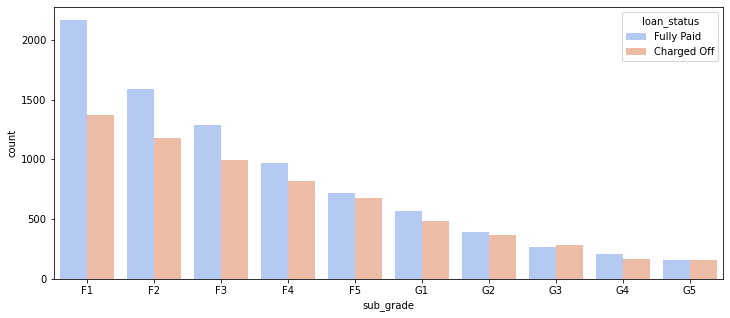

In [ ]:
# F and G subgrades dont like to pay back their loans.
# Taking a closer look
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

subgrade_order = sorted(f_and_g['sub_grade'].unique())
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',data=f_and_g,
              hue='loan_status',
              order=subgrade_order,
              palette='coolwarm')

In [ ]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,
                                         'Charged Off':0})

In [ ]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

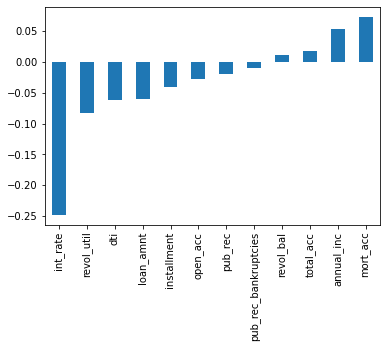

In [ ]:
'''
The correlation of the numeric features to the new loan_repaid column
'''
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

## Data Preprocessing

In [ ]:
## Handling Missing Data - Either keep,drop or fill in

len(df)

396030

In [ ]:
# Missing data interms of percentage
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [ ]:
'''
Missing Data:
emp_title               5.789208
emp_length              4.621115
title                   0.443148
revol_util              0.069692
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
'''
feat_info('emp_title')
feat_info('emp_length')
feat_info('title')
feat_info('revol_util')
feat_info('mort_acc')
feat_info('pub_rec_bankruptcies')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
The loan title provided by the borrower
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Number of mortgage accounts.
Number of public record bankruptcies


#### Missing Data in Markdown

* The job title supplied by the Borrower when applying for the loan.*
* Employment length in years. Possible values are between 0 and 10   where 0 means less than one year and 10 means ten or more years.
* The loan title provided by the borrower
* Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* Number of mortgage accounts.
* Number of public record bankruptcies

In [ ]:
# 1. Employment Titles
df['emp_title'].nunique()

173105

In [ ]:
df['emp_title'].value_counts()

Teacher                          4389
Manager                          4250
Registered Nurse                 1856
RN                               1846
Supervisor                       1830
                                 ... 
MANAGER, INFORMATION SYSTEMS        1
Safe N Sound Transportation         1
Law Offices of Mark J. Linder       1
McKim & Creed                       1
Parker & Winkelman                  1
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
'''
Too many data ponits or fill. WIthout extensive faeture engineering
and a lot of assumption and time, its not possible to fill, therefore
drop it!
'''
df = df.drop('emp_title',axis=1)

In [ ]:
# 2. Employment Length
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
emp_lenght_order=['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years',]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

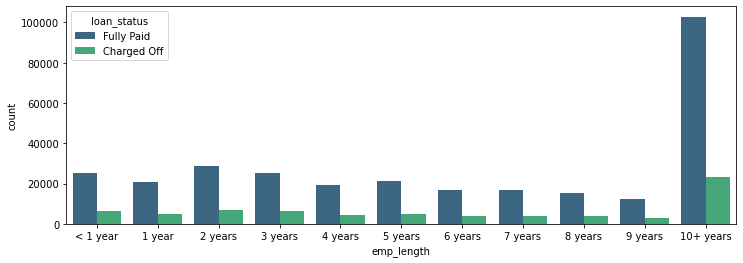

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,
              order=emp_lenght_order,
              palette='viridis',hue='loan_status')

In [ ]:
# Not conlcusive enough to consider dropping or filling.
# More Analysis
# Percent of people dont pay back their loan per emp_length category

emp_co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [ ]:
emp_fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [ ]:
emp_len = emp_co/(emp_co+emp_fp)

In [ ]:
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

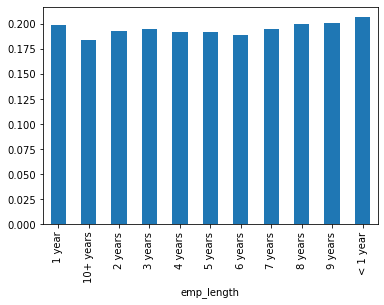

In [ ]:
emp_len.plot(kind='bar')

### It is conlusive that, no matter what the employment lenght is, about 20% of the people in every category do not pay back their loans. Therefore, this column can be dropped.

In [ ]:
df = df.drop('emp_length',axis=1)

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
# 3. Title
# Title vs Purpose columns

df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [ ]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [ ]:
'''
Just the title or purpose of the loan. Not a feature for
learning in this study. Therefore it makes sense to drop it.
'''
df = df.drop('title',axis=1)

In [ ]:
# 4. Mortgage Accounts
feat_info('mort_acc')

Number of mortgage accounts.


In [ ]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
'''
One way to fill this is to base it on a column that highly
co-relates with mort_acc
'''
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [ ]:
# Total accounts has a good positive co-relation. So, this can be used.

total_acc_means = df.groupby('total_acc').mean()['mort_acc']

In [ ]:
# Assign total_acc_means to missing mortgage account values

def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_means[total_acc]
    else:
        return mort_acc

In [ ]:
df['mort_acc']=df.apply(lambda x:
                        fill_mort_acc(x['total_acc'],
                                      x['mort_acc']),axis=1)

In [ ]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [ ]:
# 5. revol_util & pub_rec_bankruptcies
'''
These are a very small fraction compared to the data set. So,
these rows can be deleted with out any significant loss to the
model
'''
df = df.dropna()

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical and Dummy Variables
Work with non-numeric columns

In [ ]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [ ]:
# Term
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [ ]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [ ]:
df['term']=df['term'].apply(lambda term: int(term[:3]))

In [ ]:
df['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

In [ ]:
# Grade
'''
Grade is just a duplicate information of a more detailed subgrade. So,
it can be dropped
'''
df = df.drop('grade',axis=1)

In [ ]:
# Subgrade
'''
Convert this column into numeric form
'''
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [ ]:
'''
Doing same for
verification_status
application_type
initial_list_status
purpose
'''

dummies = pd.get_dummies(df[['verification_status',
                            'application_type',
                            'initial_list_status',
                            'purpose']],drop_first=True)

df = pd.concat([df.drop(['verification_status',
                            'application_type',
                            'initial_list_status',
                            'purpose'],axis=1),dummies],axis=1)

In [ ]:
# Home ownership

df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
'''
Replace NONE and ANY with other so, there are no two seperate
categories for just 32 data points

Using : pandas.DataFrame.replace

Replace values given in to_replace with value.

Values of the DataFrame are replaced with other values dynamically.
This differs from updating with .loc or .iloc, which require you to
specify a location to update with some value.
'''
df['home_ownership']= df['home_ownership'].replace(['NONE',
                                                    'ANY'],'OTHER')

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [ ]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [ ]:
# Address
# Extract only zipcodes

df['zip_code']=df['address'].apply(lambda address:address[-5:])

In [ ]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [ ]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)

df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [ ]:
df = df.drop('address',axis=1)

In [ ]:
# issue_d
feat_info('issue_d')

The month which the loan was funded


In [ ]:
'''
This study is concerned with determining whether to issue loan to
a candidate. So, issue_d is not known in a realistic scenario.
Also, it is essentially data leakage if used in this prediction
model since issue_d confirms that loan_status
'''
df = df.drop('issue_d',axis=1)

In [ ]:
# earliest_cr_line
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [ ]:
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [ ]:
'''
Just taking the year as an Interger object
'''

df['earliest_cr_line'].head(5)

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_line, dtype: int64

## Preprocessing for the model

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# drop the loan_status as it is a duplicate of loan repaid
df = df.drop('loan_status', axis=1)

In [ ]:
X = df.drop('loan_repaid',axis=1).values

In [ ]:
y = df['loan_repaid'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

# Model Creation

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X_train.shape

(316175, 78)

In [ ]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,
          epochs=25,
          batch_size=256,
         validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2962 - val_loss: 0.2642
Epoch 2/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2648 - val_loss: 0.2636
Epoch 3/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2623 - val_loss: 0.2624
Epoch 4/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2616 - val_loss: 0.2620
Epoch 5/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2608 - val_loss: 0.2619
Epoch 6/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2603 - val_loss: 0.2613
Epoch 7/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2600 - val_loss: 0.2614
Epoch 8/25
1236/1236 [==============================] - 8s 7ms/step - loss: 0.2597 - val_loss: 0.2614
Epoch 9/25
1236/1236 [==============================] - 9s 8ms/step - loss: 0.2591 - val_loss: 0.2613
Epoch 10/25
1236/1236 [==============================] - 8s 7ms/step - loss

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('Lending_club_binary_classification.h5')

## Model Evaluation

In [ ]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

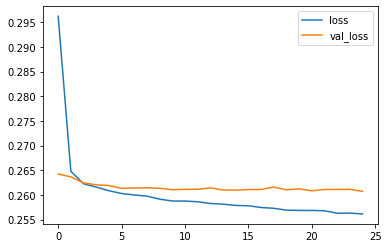

In [ ]:
losses.plot()

In [ ]:
'''
Looks alright, checks for improvement can be made by running
for more epochs with an early stopping criteria
'''
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 6987  8671]
 [  225 63161]]


In [ ]:
'''
RECALL: This is an imbalanced dataset
'''
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [ ]:
317696/len(df)

0.8038479931379817

In [ ]:
'''
f1-score can be improved
accuracy is better than just a default guess
precision is good
recall suffers
'''

'\nf1-score can be improved\naccuracy is better than just a default guess\nprecision is good\nrecall suffers\n'

## Predictions

In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_random_candidate = df.drop('loan_repaid',axis=1).iloc[random_ind]

new_random_candidate

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [ ]:
'''
Scale,tramsform and reshape data - make sure it is in proper type
and shape as the model desires it.
'''

new_customer = scaler.transform(new_random_candidate.values.reshape(1,78))

In [ ]:
model.predict_classes(new_customer)

array([[1]], dtype=int32)

In [ ]:
df.iloc[random_ind]['loan_repaid']

1.0